##### This project was originally done for Udacity Data Analyst Nanodegree. It was then expanded and modified to fit the requirements of Udacity Data Scientist Nanodegree

In [74]:
# All the necessary imports
import pandas as pd
import numpy as np
import requests
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline


# Gathering

#### The main dataset file - image_predictions.tsv

In [75]:
# Convert the main file to a pandas dataframe
df_base = pd.read_csv('twitter-archive-enhanced.csv')
print()

#### Additional Data Using Twitter API - The output file is tweet-json.txt

In [76]:
# tweet-json.txt is another file which contains different features
# Will then convert this file to a dataframe through pandas and json reading
# source: https://stackoverflow.com/questions/48488519/reading-tweets-from-json-file-to-pandas-dataframe
with open('tweet-json.txt') as json_file:
    df_twitterAPI = pd.read_json(json_file, orient = 'records', lines = True)
    
print()
#df_twitterAPI.info()

#### Preditiction data -  programmatically downloaded as image_predictions.tsv

In [77]:
# This is a provided dataset for predictin the type of dog from images. 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# convert the resulted .tsv file to a panda's dataframe
df_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
#df_predictions.info()
print()


### Summary of gathering: 
Cuurently, we've got four different dataframes: 
 ##### 1- df_base the provided twitter-archive-enhanced.csv
 ##### 2- df_twitterAPI additional data for tweets from twitter API
 ##### 3- df_predictions programmatically downloaded data from image_predictions.tsv

# Assessing

### Visual Assessment

In [78]:
df_base

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [79]:
df_twitterAPI

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [80]:
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Programmatic Assessment

In [81]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [82]:
df_twitterAPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [83]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [84]:
# is there any duplicated tweets? in all three dataframes
( sum(df_base['tweet_id'].duplicated()), 
 sum(df_twitterAPI['id'].duplicated()), 
 sum(df_predictions['tweet_id'].duplicated()) )
# from the result, we could see that all dataframes don't have any duplicated entrees

(0, 0, 0)

### Quality 1
- Remove all retweets df_base and df_twitterAPI
- Remove all replies df_base and df_twitterAPI
- Remove all ratings with non-10 denominator; this is to make data more consistant. From df_base
- Use regex to extract the correct float numerator values
- Chang the type of numerator and denominator rating from int (or string) to float64
- Replace all dog names that're "None" with an empty string. This will ensure not counting "None" as a dog name

### Tidiness
- Data from twitter API (df_twitterAPI) should be joined with df_base (only number of favorites and number of retweets) - will be combined to df_master
- The prediction with the highest property in image_prediction.tsv (df_predictions) should be joined with df_base
- Four variables in df_base (doggo, floofer, pupper, puppo) should be put in one column (dog_type)

### Quality 2
- After doing the necessary clearning and merges, change the type of tweet id to a string. We're not doing any numerical  calculations on the tweet id, so it shouldn't be a string
- Change type of retweet and favorite counts from float to int; they're no fractions of retweets and favorite in df_master
- After finishing the tidness section and getting a master dataframe, remove all the unnecessary columns

# Cleaning


In [85]:
# copying all the dataframes
df_base_clean = df_base.copy()
df_twitterAPI_clean = df_twitterAPI.copy()
df_predictions_clean = df_predictions.copy()

## Quality 1

#### - <font color='red'> Remove all retweets df_base and df_twitterAPI </font>
    
 
##### Define
We only want original tweets in our dataframes

In [86]:
sum(df_base_clean['retweeted_status_id'].notna())

181

In [87]:
sum(df_twitterAPI_clean['retweeted_status'].notna())

179

We could see that there're lots of retweets in df_twitterAPI and df_base

##### Code

In [88]:
# for df_base, if retweeted_status_id isn't blank, that means the tweet is a retweet
df_base_clean = df_base_clean[pd.notna(df_base_clean['retweeted_status_id']) == False]

In [89]:
# for df_base, if retweeted_status isn't blank, that means the tweet is a retweet
df_twitterAPI_clean = df_twitterAPI_clean[pd.notna(df_twitterAPI_clean['retweeted_status']) == False]

##### Test

In [90]:
sum(df_base_clean['retweeted_status_id'].notna())

0

In [91]:
sum(df_twitterAPI_clean['retweeted_status'].notna())

0

As the sum show in the above two blocks of code, we now don't have any retweets in df_base and df_TwitterAPI

#### <font color='red'> - Remove all replies df_base and df_twitterAPI </font>

##### Define
We only want original tweets in our dataframes

In [92]:
sum(df_base_clean['in_reply_to_status_id'].notna())

78

In [93]:
sum(df_twitterAPI_clean['in_reply_to_screen_name'].notna())

78

##### Code

In [94]:
# for df_base, if in_reply_to_status_id isn't blank, that means the tweet is a retweet
df_base_clean = df_base_clean[pd.notna(df_base_clean['in_reply_to_status_id']) == False]

In [95]:
# for df_base, if in_reply_to_screen_name isn't blank, that means the tweet is a retweet
df_twitterAPI_clean = df_twitterAPI_clean[pd.notna(df_twitterAPI_clean['in_reply_to_screen_name']) == False]

##### Test

In [96]:
sum(df_base_clean['in_reply_to_status_id'].notna())

0

In [97]:
sum(df_twitterAPI_clean['in_reply_to_screen_name'].notna())

0

As the sum show in the above two blocks of code, we now don't have any replies in df_base and df_TwitterAPI

In [98]:
# another test by showing info for both dataframes
df_base_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [99]:
df_twitterAPI_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2097 non-null datetime64[ns, UTC]
id                               2097 non-null int64
id_str                           2097 non-null int64
full_text                        2097 non-null object
truncated                        2097 non-null bool
display_text_range               2097 non-null object
entities                         2097 non-null object
extended_entities                1971 non-null object
source                           2097 non-null object
in_reply_to_status_id            0 non-null float64
in_reply_to_status_id_str        0 non-null float64
in_reply_to_user_id              0 non-null float64
in_reply_to_user_id_str          0 non-null float64
in_reply_to_screen_name          0 non-null object
user                             2097 non-null object
geo                              0 non-null float64
coordinates                      

#### - <font color='red'>Removing ratings with non-10 denomenator in df_base_clean (fixing denominator issues) </font>
    
 
##### Define
Removing non-10 denomenator isn't necessary, but it'll make out analysis easier and more consistent

In [100]:
# the different numerator values and their rate of occurence in df_base
df_base_clean['rating_denominator'].value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

From the above output, we can see that most of these numerators aren't actually compliant with the traditional rating; we'll get rid of all of them to make our analysis easier

##### Code

In [101]:
df_base_clean = df_base_clean[df_base_clean['rating_denominator'] == 10]

##### Test

In [102]:
df_base_clean['rating_denominator'].value_counts()

10    2080
Name: rating_denominator, dtype: int64

As seen from the above input, we only have denomenators of 10 now, and we only have numerators of typical values. 

#### <font color='red'> * - Numerator rating with decimal places (float values) are not extracted correctly. </font>
##### Define
Some of the numerator values are not correct, let's use regex to pick up the correct numerator values. This is evident for numerator values that're not integers (floats). The correct numerator values are only taken after the decimal place, which is not correct


In [103]:
df_base_clean['rating_numerator'].value_counts()

12      486
10      436
11      413
13      287
9       152
8        98
7        51
14       38
5        34
6        32
3        19
4        15
2         9
1         4
75        1
420       1
26        1
27        1
1776      1
0         1
Name: rating_numerator, dtype: int64

There should be some float numerator values in the above list

##### Code
Using regex, we're extracting float values before the / in each tweet, we'll replace this column with the previous one

In [104]:
df_base_clean['rating_numerator'] = df_base_clean['text'].str.extract('([0-9]+[.]?[0-9]*)[\/]', expand=True)
df_base_clean = df_base_clean.astype({"rating_numerator":'float64'}) 

##### Test

In [105]:
df_base_clean['rating_numerator'].value_counts()

12.00      486
10.00      436
11.00      413
13.00      287
9.00       152
8.00        98
7.00        51
14.00       38
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
9.75         1
0.00         1
11.26        1
11.27        1
13.50        1
420.00       1
1776.00      1
Name: rating_numerator, dtype: int64

We could see how the there're now some float values in here

####  <font color='red'> * - Chang the type of numerator and denominator rating from int (or string) to float64 </font>

##### Define
Since the numerator contains float values, it's appropriate the change the denomintaor to float as well. This will make divison easier if it was needed later in the analysis

##### Code


In [106]:
df_base_clean = df_base_clean.astype({"rating_numerator":'float64', "rating_denominator":'float64'}) 

##### Test

In [107]:
df_base_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2080 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2080 non-null object
source                        2080 non-null object
text                          2080 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2077 non-null object
rating_numerator              2080 non-null float64
rating_denominator            2080 non-null float64
name                          2080 non-null object
doggo                         2080 non-null object
floofer                       2080 non-null object
pupper                        2080 non-null object
puppo                         2080 non-null object
dtypes: float64(6), int64(1), object

####  <font color='red'> * - in df_base fix all dog names that starts with a small letter or "None" names </font>

##### Define
Lots of the names are only "a"; either remove that name or find a better name from the tweet (using regex or individual fix). Names that're either "None" or starts with a small letter will be replaced with a "" empty string

In [108]:
df_base_clean['name'].value_counts()

None        592
a            54
Charlie      11
Lucy         11
Oliver       10
           ... 
Einstein      1
Snicku        1
William       1
Antony        1
Gustav        1
Name: name, Length: 952, dtype: int64

##### Code

In [109]:
lst_small_names = set() # se of names that starts with small letters
for N in df_base_clean['name']:
    if (N[0] >= 'a') or N == "None":
        lst_small_names.add(N)
lst_small_names = list(lst_small_names)
print(lst_small_names)
df_base_clean['name'] = df_base_clean['name'].replace(lst_small_names, '')

['officially', 'an', 'very', 'all', 'space', 'my', 'a', 'mad', 'quite', 'infuriating', 'old', 'his', 'unacceptable', 'one', 'incredibly', 'the', 'life', 'None', 'by', 'actually', 'light', 'getting', 'just', 'not', 'such']


##### Test

In [110]:
df_base_clean['name'].value_counts()

            693
Lucy         11
Charlie      11
Cooper       10
Oliver       10
           ... 
Antony        1
Jennifur      1
Taz           1
Terrance      1
Jessiga       1
Name: name, Length: 928, dtype: int64

As we can see, all "None" names and names that starts with a small letters are replaced with an empty string

## Tidiness

####  <font color='blue'> * - Data from twitter API (df_twitterAPI) should be joined with df_base (only number of favorites and number of retweets)
</font>

##### Define
We're not interested in the other columns of df_twitterAPI dataframe

##### Code

In [111]:
# first: we only want id , favorite_count, and retweet_count
df_twitterAPI_clean = df_twitterAPI_clean[['id', 'favorite_count', 'retweet_count']]

In [112]:
# do the merge based based on id
df_master = df_base_clean.merge(df_twitterAPI_clean, how='inner', left_on='tweet_id', right_on='id' )
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2079
Data columns (total 20 columns):
tweet_id                      2080 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2080 non-null object
source                        2080 non-null object
text                          2080 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2077 non-null object
rating_numerator              2080 non-null float64
rating_denominator            2080 non-null float64
name                          2080 non-null object
doggo                         2080 non-null object
floofer                       2080 non-null object
pupper                        2080 non-null object
puppo                         2080 non-null object
id                            2080 n

##### Test

In [113]:
# test to see if the two ids are identical
sum(df_master['tweet_id'] != df_master['id'])

0

In [114]:
# drop the id column since it's repeated
df_master.drop('id', axis = 1, inplace=True)

####  <font color='blue'> * - The prediction with the highest property in image_prediction.tsv (df_predictions) should be joined with df_base
</font>

##### Define
The highest probable type of dog is what's important

In [115]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Code

In [116]:
# using the tweet_id, merge p1, p1_conf, and p1_dog to our master dataframe
df_predictions_clean = df_predictions_clean[['tweet_id', 'p1', 'p1_conf', 'p1_dog']]
df_master = df_master.merge(df_predictions_clean[['tweet_id', 'p1', 'p1_conf', 'p1_dog']], how='outer', left_on='tweet_id', right_on='tweet_id' )

##### Test

In [117]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 0 to 2200
Data columns (total 22 columns):
tweet_id                      2201 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2080 non-null object
source                        2080 non-null object
text                          2080 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2077 non-null object
rating_numerator              2080 non-null float64
rating_denominator            2080 non-null float64
name                          2080 non-null object
doggo                         2080 non-null object
floofer                       2080 non-null object
pupper                        2080 non-null object
puppo                         2080 non-null object
favorite_count                2080 n

As we can see fro the above .info(), We only got prediction data for 2075, which is the number of tweets in df_predictions



####  <font color='blue'> * - four variables in df_base (doggo, floofer, pupper, puppo) should be put in one column (dog_stage)
</font>

##### Define
This is to make it more tidy 

In [118]:
df_master[['tweet_id', 'doggo', 'floofer', 'pupper', 'puppo']].sample(5)

,tweet_id,doggo,floofer,pupper,puppo
642,767884188863397888,None,None,None,None
985,715696743237730304,None,None,None,None
1856,670361874861563904,None,None,None,None
61,879376492567855104,None,None,None,None
569,780192070812196864,None,None,None,None


##### Code

In [119]:
# remove all the None and NaN from the above four columns
df_master[['doggo', 'floofer', 'pupper', 'puppo']] = df_master[['doggo', 'floofer', 'pupper', 'puppo']].replace(['None', None], '')

In [120]:
# add spaces between the different stages in the tweet
df_master['dog_stage'] = df_master['doggo'] + ' ' + df_master['floofer'] + ' ' + df_master['pupper'] + ' ' + df_master['pupper']

In [121]:
# strip the extra spaces at the end each word
df_master['dog_stage'] = df_master['dog_stage'].apply(lambda x : x.strip())

In [122]:
# Drop the unnessary columns here
df_master.drop(labels = ['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace= True)

##### Test

In [123]:
df_master['dog_stage'].value_counts()

                        1888
pupper pupper            221
doggo                     73
floofer                    9
doggo  pupper pupper       9
doggo floofer              1
Name: dog_stage, dtype: int64

## Quality 2

####  <font color='red'> * - change the type of tweet id to a string.  </font>

##### Define
We're not doing any numerical  calculations on the tweet id, so it shouldn't be a string

In [124]:
type(df_master['tweet_id'][0])

numpy.int64

##### Code

In [125]:
df_master['tweet_id'] = df_master['tweet_id'].apply(str)

##### Test

In [126]:
type(df_master['tweet_id'][0])

str

####  <font color='red'> * - Change type of retweet and reply counts from float to int in df_twitterAPIk, and timestamp to datetime
 </font>

##### Define
They're no fractions of retweets or replies

In [127]:
( type(df_master['favorite_count'][0]), type(df_master['retweet_count'][0]) ) 


(numpy.float64, numpy.float64)

##### Code

In [128]:
df_master['favorite_count'] = df_master['favorite_count'].replace(np.nan, 0)
df_master['retweet_count'] = df_master['retweet_count'].replace(np.nan, 0)
df_master = df_master.astype({"favorite_count":'int64', "retweet_count":'int64', "timestamp":'datetime64'}) 

##### Test

In [129]:
( type(df_master['favorite_count'][0]), type(df_master['retweet_count'][0]) ) 

(numpy.int64, numpy.int64)

####  <font color='red'> * - After finishing the tidness section and getting a master dataframe, remove all the unnecessary columns  </font>

##### Define
There're lot of columns that we might not use in out analysis, let's inspect and decide what we'll need

In [130]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,p1,p1_conf,p1_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,39467,8853,orange,0.097049,False,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,33819,6514,Chihuahua,0.323581,True,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,25461,4328,Chihuahua,0.716012,True,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,42908,8964,paper_towel,0.170278,False,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,41048,9774,basset,0.555712,True,


##### Code

In [131]:
df_master.drop(labels = ['in_reply_to_status_id', 'in_reply_to_user_id','source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis = 1, inplace= True)

##### Test

In [132]:
df_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,p1,p1_conf,p1_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,39467,8853,orange,0.097049,False,
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,33819,6514,Chihuahua,0.323581,True,
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,25461,4328,Chihuahua,0.716012,True,
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,42908,8964,paper_towel,0.170278,False,
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,41048,9774,basset,0.555712,True,


# Saving
Save the final cleaned master dataframe to a .csv file

In [134]:
df_master.to_csv('twitter_archive_master.csv')

# Analysis
At least three separate insights should be produced here

#### Insight 1
Does the prediction formula get the highest probability prediction as a dog? 

In [135]:
#For this, we'll analyze p1_dog values
df_master['p1_dog'].value_counts().head(10)

True     1532
False     543
Name: p1_dog, dtype: int64

In [136]:
df_master['p1_dog'].value_counts()[True]/df_master['p1_dog'].count()

0.7383132530120482

The above outputs shows that the given algorithm predicted True around 73% of the time. Depending on how you look at it, this could be a good algorithm. 

#### Insight 2
What's the most common prediction from images? 

In [137]:
df_master['p1'].value_counts().head(10)

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
malamute               30
Name: p1, dtype: int64

As seen from the above value_counts(), Goldren Retreiver showed up the most in the prediction algorithm. It means that lots of pictures has something to do with Goldren Retreiver. It could be that the account owner likes this kind of dogs. 

#### Insight 3
What time of the day does the account (@dog_rates) post the most?

In [138]:
timeHours = []
for i in df_master['timestamp']:
    timeHours.append(i.hour)
timeHours = pd.Series(timeHours)    
timeHours.value_counts()

1.0     285
0.0     258
2.0     219
16.0    197
3.0     179
17.0    169
23.0    114
18.0    108
4.0      98
15.0     95
19.0     87
20.0     85
22.0     73
21.0     72
5.0      26
14.0      9
6.0       4
13.0      2
dtype: int64

From the above values, the account owner seems to tweet a lot at/after midnight. This suggests he might be an night owl person. 

# Visualization

#### Visualization 1
Time of the day vs number of tweets

Text(0.5, 1.0, 'When does @dog_rates tweet?')

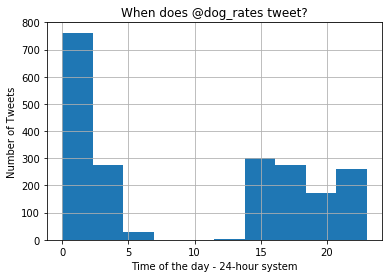

In [139]:
timeHours.hist()
plt.xlabel('Time of the day - 24-hour system')
plt.ylabel('Number of Tweets')
plt.title('When does @dog_rates tweet?')

#### Visualization 2
Number of retweets/favorite vs the rating


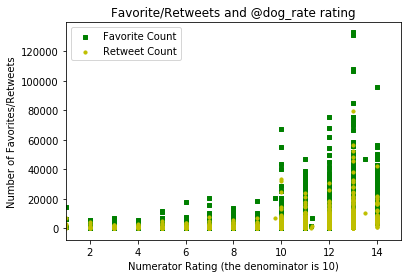

In [140]:
x = range(15)
y = range(0,120000)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(df_master['rating_numerator'], df_master['favorite_count'], s=10, c='g', marker="s", label='Favorite Count')
ax1.scatter(df_master['rating_numerator'], df_master['retweet_count'], s=10, c='y', marker="o", label='Retweet Count')
plt.legend(loc='upper left');
plt.xlim(1, 15)
plt.xlabel('Numerator Rating (the denominator is 10)')
plt.ylabel('Number of Favorites/Retweets')
plt.title('Favorite/Retweets and @dog_rate rating')
plt.show()

It seems that tweets with higher rating get more retweets/favorite; however, the number of tweets with higher raing might be much more than those with lower ratings, let's inspect that. 

In [141]:
df_master['rating_numerator'].value_counts()

12.00      486
10.00      436
11.00      413
13.00      287
9.00       152
8.00        98
7.00        51
14.00       38
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
9.75         1
0.00         1
11.26        1
11.27        1
13.50        1
420.00       1
1776.00      1
Name: rating_numerator, dtype: int64

This is kind of true, more tweets get higher rating compared to lower ratings

# Mini Conclusion

I really like this project. I think I learned a lot from it